In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('mcdonalds.csv')

In [4]:
df.columns.values

array(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
       'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like',
       'Age', 'VisitFrequency', 'Gender'], dtype=object)

In [5]:
df.shape

(1453, 15)

In [6]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [7]:
MD_x = df.iloc[:, :11].values  # Select first 11 columns and convert to a NumPy array
MD_x = (MD_x == "Yes").astype(int)    # Convert "Yes" to 1 and "No" to 0
col_means = np.round(MD_x.mean(axis=0), 2)  # Calculate column means and round to 2 decimal places

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [8]:
from sklearn.decomposition import PCA

pca = PCA()
MD_pca = pca.fit(MD_x)  # Perform PCA on the matrix

# Summary similar to R's `summary(MD.pca)`
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(MD_pca.explained_variance_ratio_))],
    'Explained Variance Ratio': np.round(MD_pca.explained_variance_ratio_, 4),
    'Cumulative Variance': np.round(np.cumsum(MD_pca.explained_variance_ratio_), 4)
})

print("Explained Variance Summary:")
print(explained_variance)

Explained Variance Summary:
      PC  Explained Variance Ratio  Cumulative Variance
0    PC1                    0.2994               0.2994
1    PC2                    0.1928               0.4922
2    PC3                    0.1330               0.6253
3    PC4                    0.0831               0.7084
4    PC5                    0.0595               0.7679
5    PC6                    0.0503               0.8182
6    PC7                    0.0438               0.8620
7    PC8                    0.0395               0.9016
8    PC9                    0.0368               0.9383
9   PC10                    0.0324               0.9707
10  PC11                    0.0293               1.0000


In [9]:
components = np.round(MD_pca.components_, 1) 
print("\nPCA Components (rounded to 1 decimal place):")
print(components)


PCA Components (rounded to 1 decimal place):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


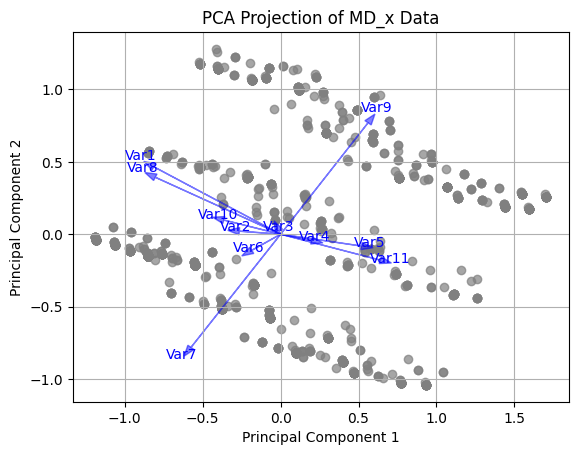

In [10]:
MD_pca = pca.fit_transform(MD_x) 

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of MD_x Data")

# Project axes (equivalent to projAxes in R)
for i, (comp1, comp2) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, comp1 * max(MD_pca[:, 0]), comp2 * max(MD_pca[:, 1]), 
              color='blue', alpha=0.5, head_width=0.05)
    plt.text(comp1 * max(MD_pca[:, 0]) * 1.1, comp2 * max(MD_pca[:, 1]) * 1.1, 
             f"Var{i+1}", color='blue', ha='center')

plt.grid()
plt.show()

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(1234)

results = []
for k in range(2, 9): 
    best_model = None
    best_score = -1
    
    # Repeat clustering 10 times and take the best (based on inertia or silhouette)
    for i in range(10):
        model = KMeans(n_clusters=k, random_state=i)
        clusters = model.fit_predict(MD_x)
        score = silhouette_score(MD_x, clusters)
        
        if score > best_score:
            best_model = model
            best_score = score
            
    # Store the best model for each k
    results.append((k, best_model, best_score))

# Find the best clustering (highest silhouette score across all k)
best_k, best_model, best_score = max(results, key=lambda x: x[2])

# Optional: relabel clusters if needed based on your requirements
labels = best_model.labels_

/home/saif/.conda/envs/visa/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/saif/.conda/envs/visa/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/saif/.conda/envs/visa/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/saif/.conda/envs/visa/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` wi

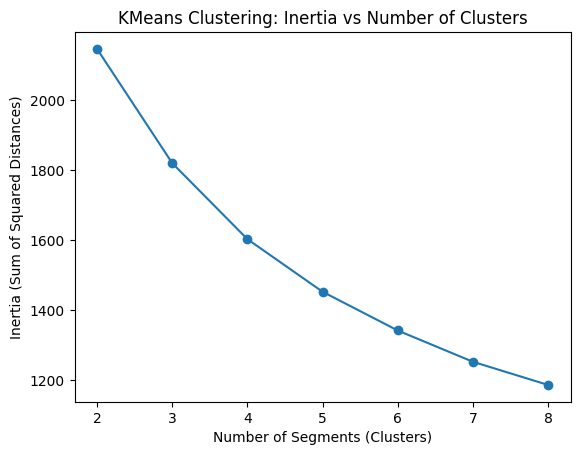

In [12]:
from sklearn.metrics import silhouette_score

np.random.seed(1234)

cluster_range = range(2, 9)

inertia_scores = []
silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    
    inertia_scores.append(kmeans.inertia_)
    
    silhouette_scores.append(silhouette_score(MD_x, kmeans.labels_))

# Plotting inertia (or silhouette scores)
plt.plot(cluster_range, inertia_scores, marker='o')
plt.xlabel("Number of Segments (Clusters)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("KMeans Clustering: Inertia vs Number of Clusters")
plt.show()

In [13]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Set seed for reproducibility
np.random.seed(1234)

# Define a function for fitting mixture models
def fit_mixture_models(data, k_range, nrep, model_type="binary"):
    best_models = {}
    for k in k_range:
        best_score = -np.inf
        best_model = None
        for _ in range(nrep):
            if model_type == "binary":
                model = GaussianMixture(n_components=k, covariance_type="spherical", random_state=np.random.randint(1000))
            else:
                # Add logic for other types of models if needed
                model = GaussianMixture(n_components=k, random_state=np.random.randint(1000))
            model.fit(data)
            if model.lower_bound_ > best_score:
                best_score = model.lower_bound_
                best_model = model
        best_models[k] = best_model
    return best_models

# Example usage
k_range = range(2, 9)
MD_m28 = fit_mixture_models(MD_x, k_range, nrep=10, model_type="binary")

# Print a summary
for k, model in MD_m28.items():
    print(f"k = {k}, Log-likelihood = {model.lower_bound_}")

k = 2, Log-likelihood = -5.085918532670111
k = 3, Log-likelihood = -4.368140393856061
k = 4, Log-likelihood = 0.6888338785786564
k = 5, Log-likelihood = 5.962638730501403
k = 6, Log-likelihood = 6.4340826542034435
k = 7, Log-likelihood = 9.206811944898039
k = 8, Log-likelihood = 13.506407291002136


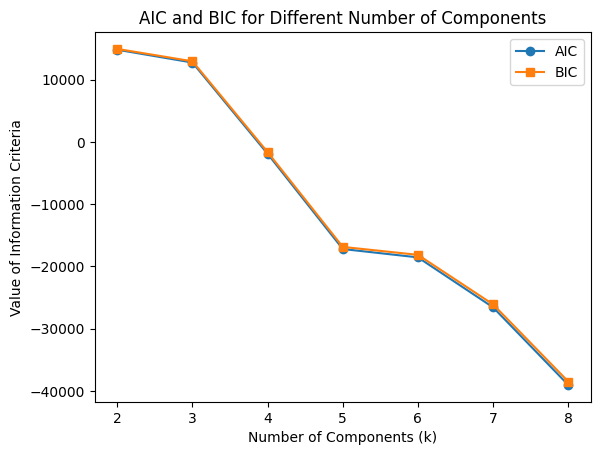

In [14]:
aic_values = [model.aic(MD_x) for model in MD_m28.values()]
bic_values = [model.bic(MD_x) for model in MD_m28.values()]
k_values = list(MD_m28.keys())

# Plotting AIC and BIC
plt.plot(k_values, aic_values, label='AIC', marker='o')
plt.plot(k_values, bic_values, label='BIC', marker='s')
plt.xlabel("Number of Components (k)")
plt.ylabel("Value of Information Criteria")
plt.title("AIC and BIC for Different Number of Components")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix

MD_m4 = MD_m28[4]

# Get cluster assignments
mixture_clusters = MD_m4.predict(MD_x)

# Fit KMeans with 4 clusters for comparison
kmeans_model = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
kmeans_clusters = kmeans_model.labels_

# Create a contingency table
contingency_table = pd.crosstab(kmeans_clusters, mixture_clusters)
print(contingency_table)

col_0    0    1    2    3
row_0                    
0        0  331   33    0
1        0  240    0    0
2        0   57  359  117
3      236   80    0    0


/home/saif/.conda/envs/visa/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix


initial_clusters = kmeans_model.labels_  

MD_m4a = GaussianMixture(n_components=4, covariance_type="spherical", random_state=1234)
MD_m4a.fit(MD_x)

mixture_clusters = MD_m4a.predict(MD_x)

contingency_table = pd.crosstab(initial_clusters, mixture_clusters)
print(contingency_table)


col_0    0    1    2    3
row_0                    
0       41    6  304   13
1        0  238    0    2
2      481    0    0   52
3        0    0    0  316


In [17]:
# Log-likelihood of the refitted mixture model (MD_m4a)
log_lik_m4a = MD_m4a.score(MD_x) * len(MD_x)
print(f"Log-Likelihood (MD_m4a): {log_lik_m4a}")

# Log-likelihood of the original mixture model (MD_m4)
log_lik_m4 = MD_m4.score(MD_x) * len(MD_x)
print(f"Log-Likelihood (MD_m4): {log_lik_m4}")


Log-Likelihood (MD_m4a): -6076.50103534018
Log-Likelihood (MD_m4): 1001.5368822999601


In [18]:
like_counts = df['Like'].value_counts()
reversed_counts = like_counts.iloc[::-1]  # Reverse the order
print(reversed_counts)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [19]:
df['Like_n'] = 6 - df['Like'].astype('category').cat.codes

# Create a frequency table
like_n_counts = df['Like_n'].value_counts()
print(like_n_counts)

Like_n
 4    229
 5    187
-2    169
 3    160
 6    152
-3    152
-4    143
 0     73
-1     71
 1     59
 2     58
Name: count, dtype: int64


In [20]:
columns = df.columns[:11] 
f = " + ".join(columns)

f = f"Like.n ~ {f}"
print(f)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [21]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage

MD_x_transposed = MD_x.T  

distance_matrix = pdist(MD_x_transposed)

MD_vclust = linkage(distance_matrix, method='ward')

print(MD_vclust)

[[ 1.          5.         13.82027496  2.        ]
 [ 0.          7.         15.13274595  2.        ]
 [ 3.         11.         17.7294482   3.        ]
 [ 2.          9.         18.30300522  2.        ]
 [ 8.         10.         22.38302929  2.        ]
 [ 4.         15.         24.90649179  3.        ]
 [ 6.         13.         26.76129045  4.        ]
 [14.         16.         29.41541546  5.        ]
 [12.         17.         31.56210808  6.        ]
 [18.         19.         51.61489097 11.        ]]


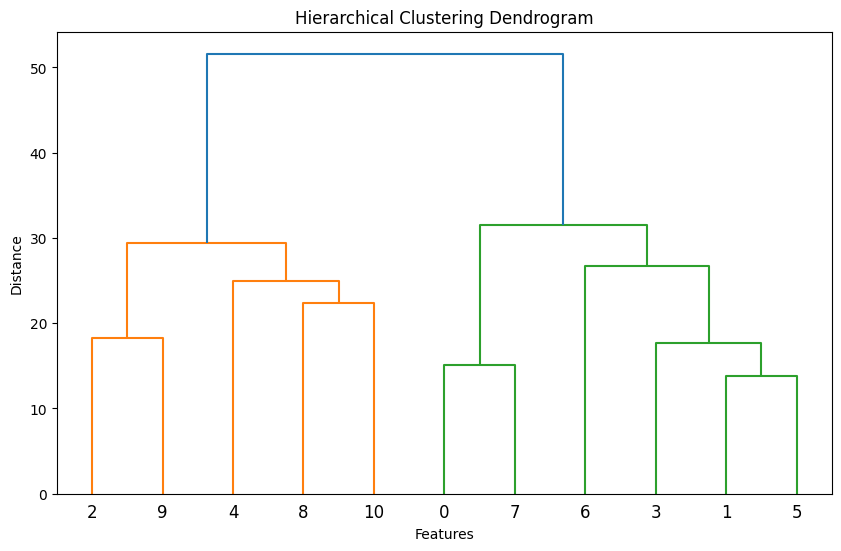

In [26]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

MD_x_transposed = MD_x.T  

distance_matrix = pdist(MD_x_transposed)

# Perform hierarchical clustering
MD_vclust = linkage(distance_matrix, method='ward')

# (Optional) Visualize the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
dendrogram(MD_vclust)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Features")
plt.ylabel("Distance")
plt.show()